In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [2]:
df = pd.read_excel('dataset.xls') 

In [3]:
df.head(1)

,USER_ID,AGE,GENDER,HEIGHT,WEIGHT,SMOKE_STATUS,COUNTRY_RES,COUNTRY_DES,ITEM_ID
0,76CFAE35-745D-D445-FEDE-AFE168D9FB1A,47,F,195,87,F,United States,Japan,10009


In [4]:
#finding columns with null values

df.isnull().sum(axis = 0)

USER_ID         0
AGE             0
GENDER          0
HEIGHT          0
WEIGHT          0
SMOKE_STATUS    0
COUNTRY_RES     0
COUNTRY_DES     0
ITEM_ID         0
dtype: int64

In [5]:
#Combine Country of residence and country of destination to form a relationship

df['COUNTRY_REL'] = df['COUNTRY_RES']+ '_'+df['COUNTRY_DES']
df.head(1)

,USER_ID,AGE,GENDER,HEIGHT,WEIGHT,SMOKE_STATUS,COUNTRY_RES,COUNTRY_DES,ITEM_ID,COUNTRY_REL
0,76CFAE35-745D-D445-FEDE-AFE168D9FB1A,47,F,195,87,F,United States,Japan,10009,United States_Japan


In [6]:
# We will create the following bins: AGE_GROUP, HEIGHT, WEIGHT

#AGE_GROUP
bins_age_group = [10,20,30,40,60,70,80]
bin_labels_age_group = ['<20','20-29', '30-39', '40-59', '60-79', '>80']

# We will create a new attribute `age_group`:
df['AGE_GROUP'] = pd.cut(df.AGE, bins_age_group, right=False, labels = bin_labels_age_group)

df.AGE_GROUP.value_counts().sort_index()

<20        0
20-29    190
30-39    180
40-59    355
60-79    170
>80      181
Name: AGE_GROUP, dtype: int64

In [7]:
#HEIGHT

bins_height = [150,160,170,180,190,200]
bin_labels_height = ['<160','160-169', '170-179', '180-189', '>190']

# We will create a new attribute `age_group`:
df['HEIGHT_GROUP'] = pd.cut(df.HEIGHT, bins_height, right=False, labels = bin_labels_height)

df.HEIGHT_GROUP.value_counts().sort_index()

<160       243
160-169    250
170-179    236
180-189    235
>190       136
Name: HEIGHT_GROUP, dtype: int64

In [8]:
#WEIGHT

bins_weight = [40,50,60,70,80,90]
bin_labels_weight = ['<50','50-59','60-69', '70-79', '>80']

# We will create a new attribute `age_group`:
df['WEIGHT_GROUP'] = pd.cut(df.WEIGHT, bins_weight, right=False, labels = bin_labels_weight)

df.WEIGHT_GROUP.value_counts().sort_index()

<50       74
50-59    282
60-69    235
70-79    253
>80      256
Name: WEIGHT_GROUP, dtype: int64

In [9]:
#Remove processed features
df = df.drop('AGE',axis = 1)
df = df.drop('HEIGHT',axis = 1)
df = df.drop('WEIGHT',axis = 1)
df = df.drop('COUNTRY_RES',axis = 1)
df = df.drop('COUNTRY_DES',axis = 1)
df.head(1)

,USER_ID,GENDER,SMOKE_STATUS,ITEM_ID,COUNTRY_REL,AGE_GROUP,HEIGHT_GROUP,WEIGHT_GROUP
0,76CFAE35-745D-D445-FEDE-AFE168D9FB1A,F,F,10009,United States_Japan,40-59,>190,>80


In [10]:
#One hot encoding for GENDER
one_hot_gender = pd.get_dummies(df.GENDER, prefix='GENDER')

df = df.join(one_hot_gender)
df = df.drop('GENDER',axis = 1)

In [11]:
#One hot encoding for SMOKE_STATUS
one_hot_smoke = pd.get_dummies(df.SMOKE_STATUS, prefix='SMOKE_STATUS')

df = df.join(one_hot_smoke)
df = df.drop('SMOKE_STATUS',axis = 1)

In [12]:
#One hot encoding for AGE_GROUP
one_hot_age_group = pd.get_dummies(df.AGE_GROUP, prefix='AGE_GROUP')

df = df.join(one_hot_age_group)
df = df.drop('AGE_GROUP',axis = 1)

In [13]:
#One hot encoding for HEIGHT_GROUP
one_hot_height_group = pd.get_dummies(df.HEIGHT_GROUP, prefix='HEIGHT_GROUP')

df = df.join(one_hot_height_group)
df = df.drop('HEIGHT_GROUP',axis = 1)

In [14]:
#One hot encoding for WEIGHT_GROUP
one_hot_weight_group = pd.get_dummies(df.WEIGHT_GROUP, prefix='WEIGHT_GROUP')

df = df.join(one_hot_weight_group)
df = df.drop('WEIGHT_GROUP',axis = 1)

In [15]:
#One hot encoding for COUNTRY_REL
one_hot_country_rel = pd.get_dummies(df.COUNTRY_REL, prefix='COUNTRY_REL')

df = df.join(one_hot_country_rel)
df = df.drop('COUNTRY_REL',axis = 1)

In [16]:
df.head(1)

,USER_ID,ITEM_ID,GENDER_F,GENDER_M,GENDER_T,SMOKE_STATUS_E,SMOKE_STATUS_F,SMOKE_STATUS_H,SMOKE_STATUS_L,SMOKE_STATUS_N,...,COUNTRY_REL_Zambia_Italy,COUNTRY_REL_Zambia_Japan,COUNTRY_REL_Zambia_United Arab Emirates,COUNTRY_REL_Zambia_United States,COUNTRY_REL_Zimbabwe_Italy,COUNTRY_REL_Zimbabwe_Japan,COUNTRY_REL_Zimbabwe_United Arab Emirates,COUNTRY_REL_Zimbabwe_United States,COUNTRY_REL_Åland Islands_Canada,COUNTRY_REL_Åland Islands_Japan
0,76CFAE35-745D-D445-FEDE-AFE168D9FB1A,10009,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Drop User id from data set
df = df.drop('USER_ID',axis = 1)

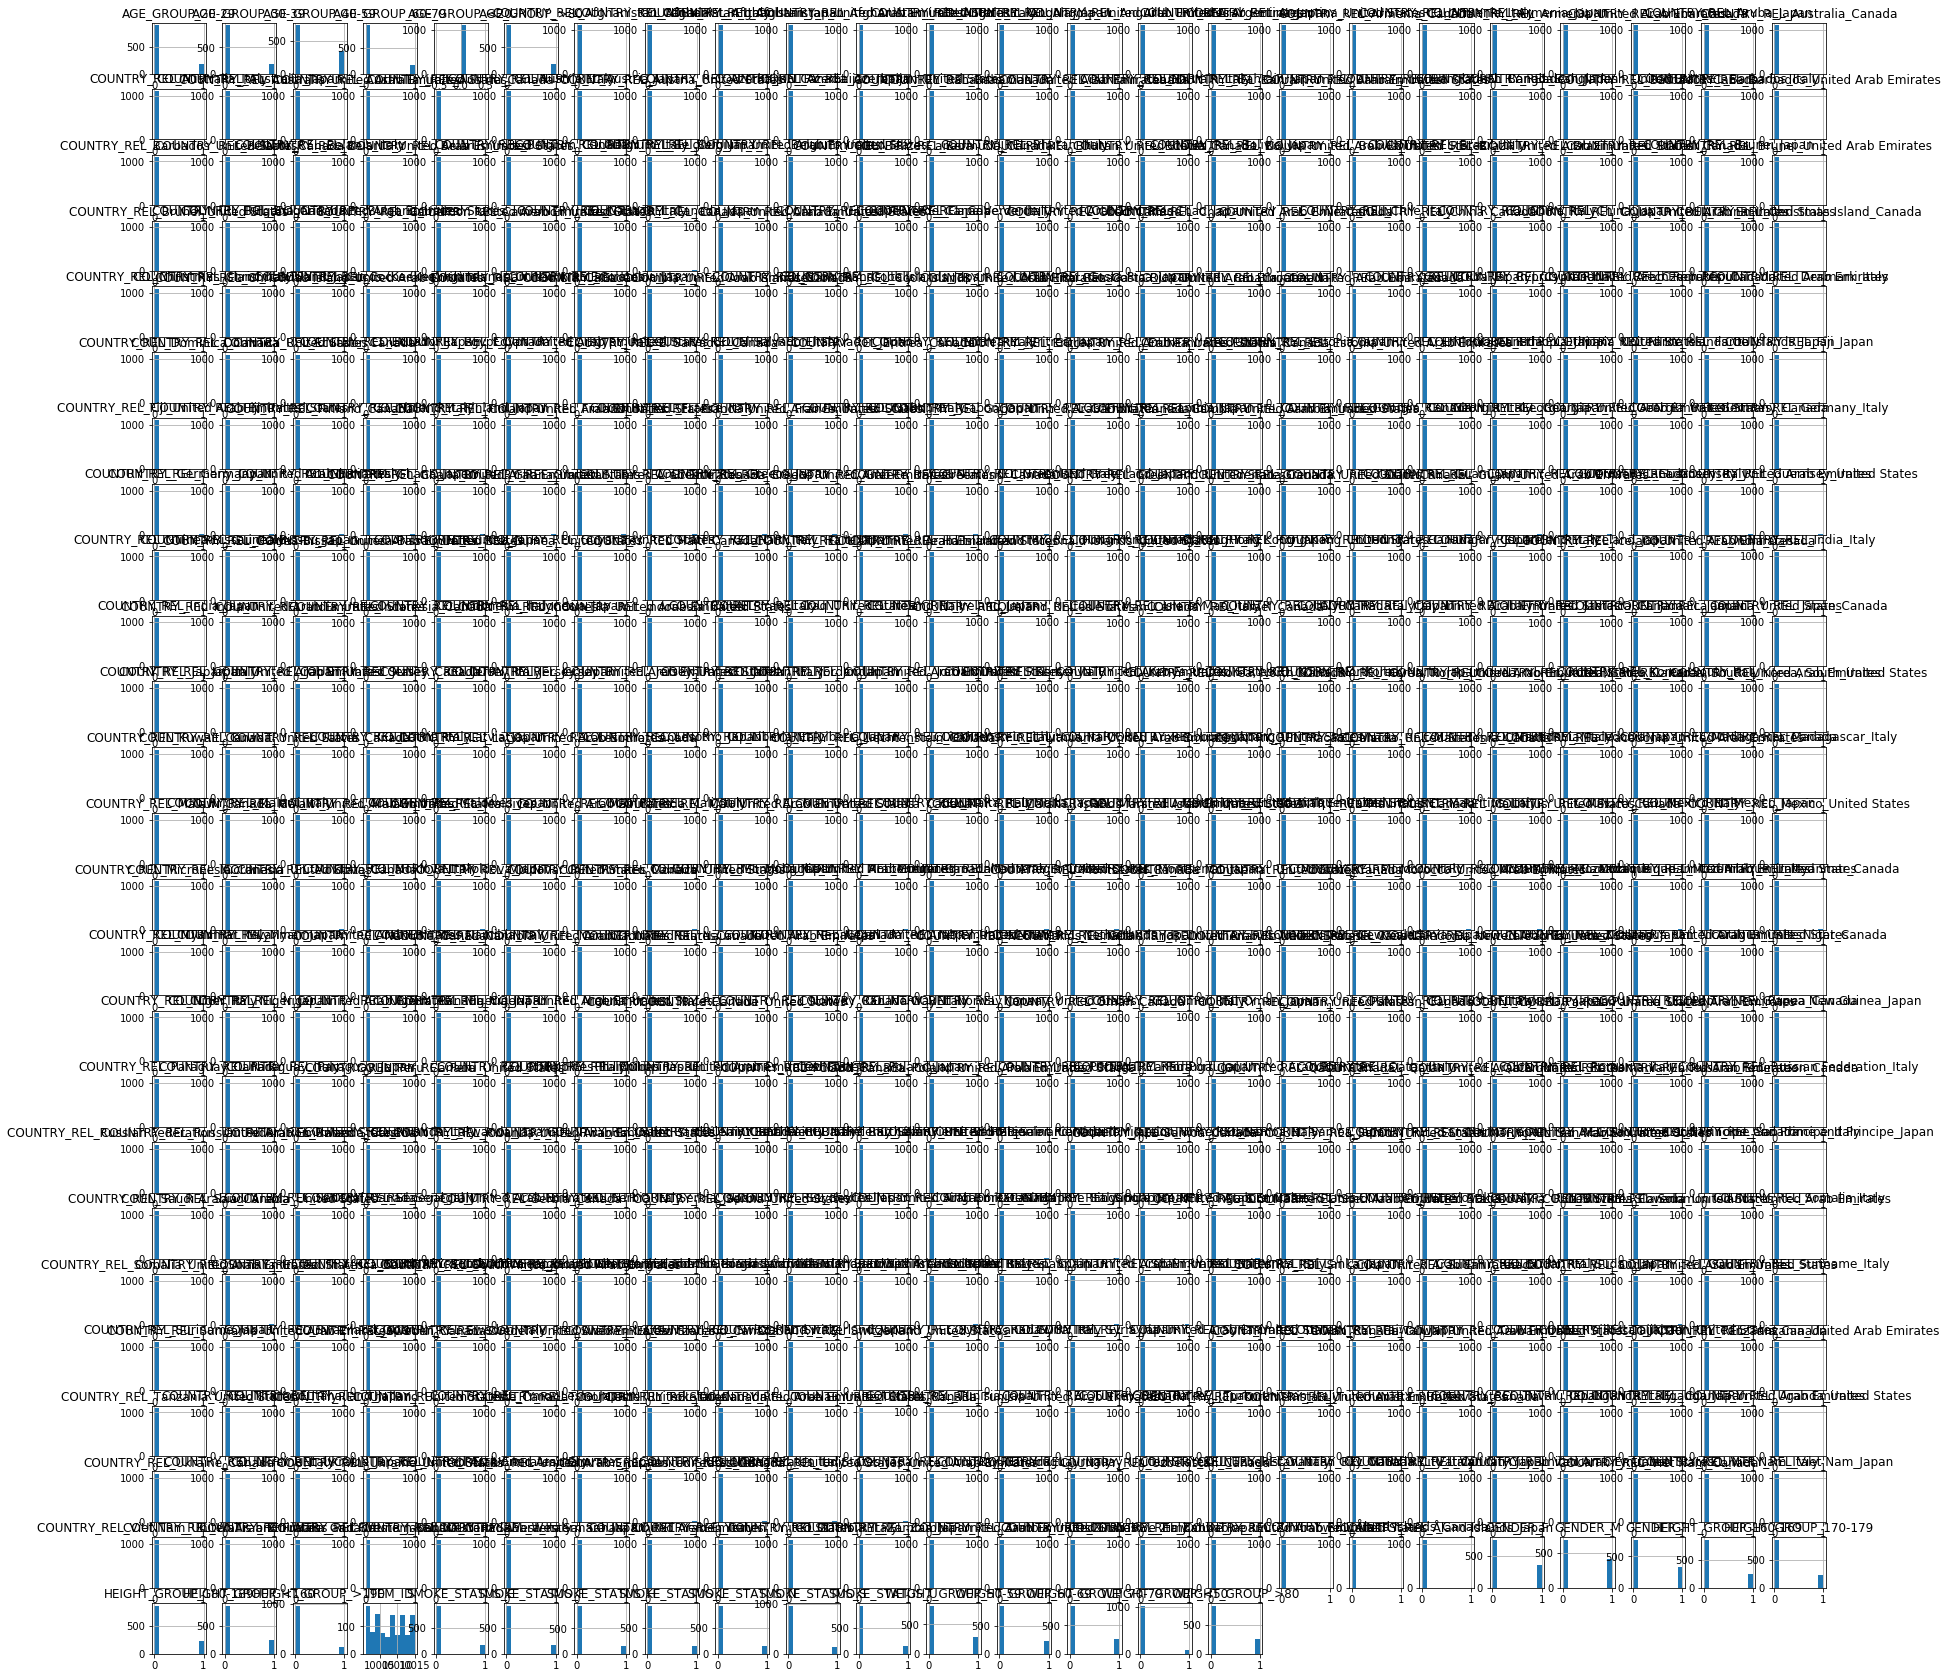

In [18]:
df.hist(figsize=(30,30))
plot.show()

In [19]:
# Find the correlation between target and features

corr_matrix=df.corr()
corr_matrix["ITEM_ID"].sort_values(ascending=False)

ITEM_ID                             1.000000
SMOKE_STATUS_L                      0.087848
COUNTRY_REL_United States_Japan     0.085086
WEIGHT_GROUP_60-69                  0.071414
COUNTRY_REL_Jersey_United States    0.062410
                                      ...   
COUNTRY_REL_Thailand_Italy         -0.060443
COUNTRY_REL_India_Japan            -0.064994
COUNTRY_REL_Turkey_Japan           -0.065285
SMOKE_STATUS_S                     -0.068289
AGE_GROUP_<20                            NaN
Name: ITEM_ID, Length: 592, dtype: float64

In [20]:
#Creating heat map to find correlation between features

#import seaborn as sns

#corr = df.corr()
#top_corr_features = corr.index
#plot.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Error in callback <function flush_figures at 0x1207930e0> (for post_execute):


KeyboardInterrupt: 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Columns: 592 entries, ITEM_ID to COUNTRY_REL_Åland Islands_Japan
dtypes: int64(1), uint8(591)
memory usage: 643.6 KB


In [22]:
df.head(5)

,ITEM_ID,GENDER_F,GENDER_M,GENDER_T,SMOKE_STATUS_E,SMOKE_STATUS_F,SMOKE_STATUS_H,SMOKE_STATUS_L,SMOKE_STATUS_N,SMOKE_STATUS_S,...,COUNTRY_REL_Zambia_Italy,COUNTRY_REL_Zambia_Japan,COUNTRY_REL_Zambia_United Arab Emirates,COUNTRY_REL_Zambia_United States,COUNTRY_REL_Zimbabwe_Italy,COUNTRY_REL_Zimbabwe_Japan,COUNTRY_REL_Zimbabwe_United Arab Emirates,COUNTRY_REL_Zimbabwe_United States,COUNTRY_REL_Åland Islands_Canada,COUNTRY_REL_Åland Islands_Japan
0,10009,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10008,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10010,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10008,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10013,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Rename item_id to target
df.rename(columns={'ITEM_ID':'TARGET'},inplace=True)

In [24]:
X = df.drop("TARGET", axis=1)
y = df["TARGET"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)

In [26]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(X_train)
#X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

# training a DescisionTreeClassifier 
#from sklearn.tree import DecisionTreeClassifier 
#dtree_model = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train) 

In [27]:
#SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())



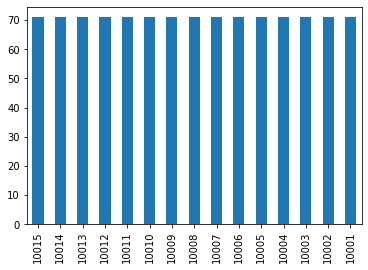

In [28]:
pd.Series(y_train_new).value_counts().plot.bar()

In [29]:
#X_train_new.hist(figsize=(30,30))
#plot.show()

In [30]:
#Regression wont work here
#from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(n_estimators = 500, oob_score=True, random_state = 0)
#regressor.fit(X_train, y_train)

#from sklearn.metrics import r2_score
#from scipy.stats import spearmanr, pearsonr
#predicted_train = regressor.predict(X_train)
#predicted_test = regressor.predict(X_test)
#test_score = r2_score(y_test, predicted_test)
#spearman = spearmanr(y_test, predicted_test)
#pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
#print(f'Test data R-2 score: {test_score:>5.3}')
#print(f'Test data Spearman correlation: {spearman[0]:.3}')
#print(f'Test data Pearson correlation: {pearson[0]:.3}')

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

AdaBoost
Confusion matrix, without normalization
[[ 8  7  0  0  3  6  1  0  6  2 11  2 11 12  2]
 [ 6  5  1  5  0  2  1  0  5  0 10  0 10 16  1]
 [ 4  7  3  2  2  7  0  0  6  0  8  3 15  8  0]
 [ 0  4  1  8  0  5  1  0  1  0  3  2  9 16  1]
 [ 4  3  0  3  4  9  1  0  1  1  8  4 15 11  0]
 [ 0  4  2  3  0 10  1  0  1  3  8  4 12 11  0]
 [ 6  4  0  5  1  5 12  0  4  0  3  2  2  3  1]
 [ 2  4  0  1  0  2  0  0  6  2  8  5 11 12  3]
 [ 5  1  1  0  1  6  2  0  9  0 10  5 13 11  4]
 [ 1  2  0  2  1  6  0  1  3  4  2  3 21  9  1]
 [ 0  2  1  3  0  5  2  0  1  1 20  4  8  6  2]
 [ 7  4  1  2  0  4  1  0  4  0  8  8 11  9  3]
 [ 4  2  0  3  0  1  0  0  3  0  4  5 20  3  0]
 [ 6  3  2  3  1  4  1  0  3  2  8  6 10 16  0]
 [ 3  4  1  0  0  0  1  0  4  0  9  6  5  5 15]]


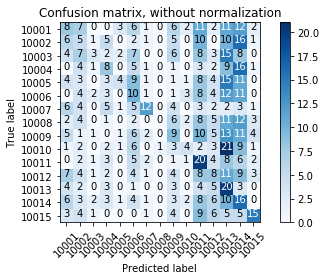

              precision    recall  f1-score   support

       10001      0.143     0.113     0.126        71
       10002      0.089     0.081     0.085        62
       10003      0.231     0.046     0.077        65
       10004      0.200     0.157     0.176        51
       10005      0.308     0.062     0.104        64
       10006      0.139     0.169     0.153        59
       10007      0.500     0.250     0.333        48
       10008      0.000     0.000     0.000        56
       10009      0.158     0.132     0.144        68
       10010      0.267     0.071     0.113        56
       10011      0.167     0.364     0.229        55
       10012      0.136     0.129     0.132        62
       10013      0.116     0.444     0.183        45
       10014      0.108     0.246     0.150        65
       10015      0.455     0.283     0.349        53

    accuracy                          0.161       880
   macro avg      0.201     0.170     0.157       880
weighted avg      0.196   

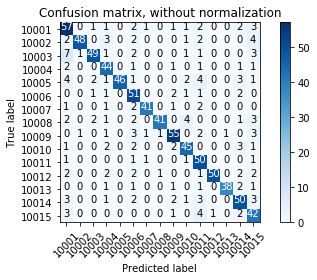

              precision    recall  f1-score   support

       10001      0.671     0.803     0.731        71
       10002      0.960     0.774     0.857        62
       10003      0.891     0.754     0.817        65
       10004      0.733     0.863     0.793        51
       10005      1.000     0.719     0.836        64
       10006      0.689     0.864     0.767        59
       10007      0.932     0.854     0.891        48
       10008      0.953     0.732     0.828        56
       10009      0.833     0.809     0.821        68
       10010      0.789     0.804     0.796        56
       10011      0.676     0.909     0.775        55
       10012      0.980     0.806     0.885        62
       10013      0.974     0.844     0.905        45
       10014      0.735     0.769     0.752        65
       10015      0.618     0.792     0.694        53

    accuracy                          0.803       880
   macro avg      0.829     0.806     0.810       880
weighted avg      0.828   

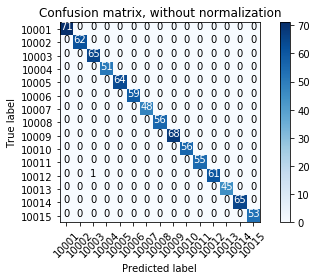

              precision    recall  f1-score   support

       10001      1.000     1.000     1.000        71
       10002      1.000     1.000     1.000        62
       10003      0.985     1.000     0.992        65
       10004      1.000     1.000     1.000        51
       10005      1.000     1.000     1.000        64
       10006      1.000     1.000     1.000        59
       10007      1.000     1.000     1.000        48
       10008      1.000     1.000     1.000        56
       10009      1.000     1.000     1.000        68
       10010      1.000     1.000     1.000        56
       10011      1.000     1.000     1.000        55
       10012      1.000     0.984     0.992        62
       10013      1.000     1.000     1.000        45
       10014      1.000     1.000     1.000        65
       10015      1.000     1.000     1.000        53

    accuracy                          0.999       880
   macro avg      0.999     0.999     0.999       880
weighted avg      0.999   

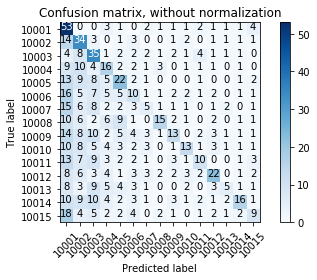

              precision    recall  f1-score   support

       10001      0.247     0.746     0.371        71
       10002      0.276     0.548     0.368        62
       10003      0.297     0.538     0.383        65
       10004      0.258     0.314     0.283        51
       10005      0.349     0.344     0.346        64
       10006      0.227     0.169     0.194        59
       10007      0.208     0.104     0.139        48
       10008      0.556     0.268     0.361        56
       10009      0.406     0.191     0.260        68
       10010      0.448     0.232     0.306        56
       10011      0.370     0.182     0.244        55
       10012      0.512     0.355     0.419        62
       10013      0.333     0.111     0.167        45
       10014      0.533     0.246     0.337        65
       10015      0.321     0.170     0.222        53

    accuracy                          0.316       880
   macro avg      0.356     0.301     0.293       880
weighted avg      0.358   

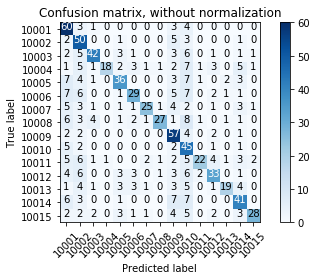

              precision    recall  f1-score   support

       10001      0.522     0.845     0.645        71
       10002      0.481     0.806     0.602        62
       10003      0.778     0.646     0.706        65
       10004      0.947     0.353     0.514        51
       10005      0.655     0.562     0.605        64
       10006      0.674     0.492     0.569        59
       10007      0.806     0.521     0.633        48
       10008      0.871     0.482     0.621        56
       10009      0.548     0.838     0.663        68
       10010      0.372     0.804     0.508        56
       10011      0.815     0.400     0.537        55
       10012      0.660     0.532     0.589        62
       10013      0.792     0.422     0.551        45
       10014      0.594     0.631     0.612        65
       10015      0.848     0.528     0.651        53

    accuracy                          0.605       880
   macro avg      0.691     0.591     0.600       880
weighted avg      0.679   

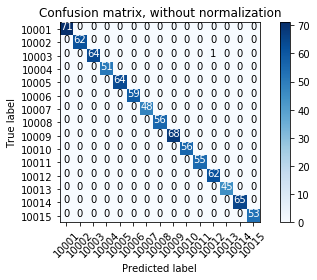

              precision    recall  f1-score   support

       10001      1.000     1.000     1.000        71
       10002      1.000     1.000     1.000        62
       10003      1.000     0.985     0.992        65
       10004      1.000     1.000     1.000        51
       10005      1.000     1.000     1.000        64
       10006      1.000     1.000     1.000        59
       10007      1.000     1.000     1.000        48
       10008      1.000     1.000     1.000        56
       10009      1.000     1.000     1.000        68
       10010      1.000     1.000     1.000        56
       10011      1.000     1.000     1.000        55
       10012      0.984     1.000     0.992        62
       10013      1.000     1.000     1.000        45
       10014      1.000     1.000     1.000        65
       10015      1.000     1.000     1.000        53

    accuracy                          0.999       880
   macro avg      0.999     0.999     0.999       880
weighted avg      0.999   

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
import itertools    
from sklearn.metrics import classification_report
models = [
            ('AdaBoost', AdaBoostClassifier()), 
            ('GradBoost', GradientBoostingClassifier()), 
            ('DTree', DecisionTreeClassifier()), 
            ('KNN', KNeighborsClassifier()), 
            ('GNB', GaussianNB()), 
            ('RF', RandomForestClassifier())
        ]

for name, model in models:
        clf = model.fit(X_train_new, y_train_new)
        print(name)
        y_train_pred = model.predict(X_train)
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_train, y_train_pred)
        np.set_printoptions(precision=2)
        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['10001','10002','10003','10004','10005','10006','10007','10008','10009','10010','10011','10012','10013','10014','10015'],
                      title='Confusion matrix, without normalization')
        plt.show()
        print(classification_report(y_train, y_train_pred, digits=3, zero_division = 0))